# Bank Marketing

## Overview

The  data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.  

We chose this dataset because its big enough, so when we split it into train, validation and test, these subsets will be relatively big for our algorithms to learn well increasing their accuracy and reliability also because Marketing is a very crucial part of every business, so knowing how to win a customer sounded very interesting to us since we are anticipating on changing the world in the business field in future.

## Dataset Overview
### The Dataset has 20 Input Variables  (Features):

**#bank client data:**  
1 - _Age_ (numeric)  
2 - _Job_ **:** type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')  
3 - _Marital_ **:** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
4 - _Education_ (categorical:   'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')  
5 - _Default_ **:** has credit in default? (categorical: 'no', 'yes', 'unknown')
6 - _Housing_ **:** has housing loan? (categorical: 'no', 'yes', 'unknown')  
7 - _Loan_ **:** has personal loan? (categorical: 'no', 'yes', 'unknown')  

**#related with the last contact of the current campaign:**  
8 - _Contact_ **:** contact communication type (categorical: 'cellular', 'telephone')  
9 - _Month_ **:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10 - _Day_of_week_ **:** last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')  
11 - _Duration_ **:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  

**#other attributes:**  
12 - _Campaign_ **:** number of contacts performed during this campaign and for this client (numeric, includes last contact)  
13 - _pDays_ **:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14 - _Previous_ **:** number of contacts performed before this campaign and for this client (numeric)  
15 - _pOutcome_ **:** outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')  

**#social and economic context attributes**  
16 - _emp.var.rate_ **:** employment variation rate - quarterly indicator (numeric)  
17 - _cons.price.idx_ **:** consumer price index - monthly indicator (numeric)  
18 - _cons.conf.idx_ **:** consumer confidence index - monthly indicator (numeric)  
19 - _Euribor3m_ **:** euribor 3 month rate - daily indicator (numeric)  
20 - _nr.employed_ **:** number of employees - quarterly indicator (numeric)  

### Output Variable (Desired Target):
y - has the client subscribed a term deposit? (binary: 'yes', 'no')

## Contributors:
* Phillip Moyo – 2185695   
* Moshito Charles Makgakga – 1445435   
* Godfrey T Chamunogwa – 2234379
* Fankholoro Vincent Sebothoma – 1671848   

# Logistic Regression
 

# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler

# Import the Dataset


In [2]:
df = pd.read_csv('bank-full.csv', sep=";")


## Trimming the Data
The Data is heavily biased, so we are trimming it to make the different output classes more even (unbiased)

In [3]:
df_yes = df[df['y']=='yes']
df_no = df[df['y']=='no']
df_no = df_no.iloc[:5289, :]

df = pd.concat([df_yes, df_no])
df = df.sample(frac=1).reset_index(drop=True)       #shuffle the rows
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34,services,single,secondary,no,-374,yes,no,cellular,11,may,672,1,-1,0,unknown,yes
1,30,technician,single,tertiary,no,-522,yes,no,unknown,13,may,375,1,-1,0,unknown,no
2,55,retired,married,secondary,no,102,yes,no,unknown,7,may,74,1,-1,0,unknown,no
3,56,retired,divorced,tertiary,no,158,no,yes,cellular,21,jul,854,1,-1,0,unknown,yes
4,27,student,single,secondary,no,6036,no,no,cellular,31,mar,175,1,181,1,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10573,34,blue-collar,married,secondary,no,1710,yes,yes,unknown,19,may,187,3,-1,0,unknown,no
10574,30,blue-collar,single,primary,no,4009,yes,no,unknown,23,may,260,4,-1,0,unknown,no
10575,57,retired,married,secondary,no,486,yes,no,unknown,5,may,180,2,-1,0,unknown,no
10576,49,technician,divorced,unknown,no,387,no,no,cellular,28,jan,325,1,-1,0,unknown,yes


# Feature Scaling

In [4]:
##--scaling column(y)=> 'yes'=1 and 'no'=0 also @there are no null values in our dataset---##
y = LabelEncoder()
df.iloc[:,-1] = y.fit_transform(df.iloc[:,-1])

In [5]:
##--scaling column(poutcome)=> 'failure'=0, 'other'=1, 'success'=2, 'unknown'=3
poutcome = LabelEncoder()
df.iloc[:,-2] = poutcome.fit_transform(df.iloc[:,-2])

In [6]:
##--scaling column(contact)=> 'cellular'=0, 'telephone'=1, 'unknown'=2
contact = LabelEncoder()
df.iloc[:,8] = contact.fit_transform(df.iloc[:,8])

In [7]:
##--scaling column(marital)=> 'married'=1, 'divorced'=0, 'single'=2
marital = LabelEncoder()
df.iloc[:,2] = marital.fit_transform(df.iloc[:,2])

In [8]:
##--scaling column(education)=> 'primary'=0, 'secondary'=1, 'tertiary'=2, 'unknown'=3
education = LabelEncoder()
df.iloc[:,3] = education.fit_transform(df.iloc[:,3])

In [9]:
##--scaling column(default)=> 'yes'=1, 'no'=0'
default = LabelEncoder()
df.iloc[:,4] = default.fit_transform(df.iloc[:,4])

In [10]:
##--scaling column(housing)=> 'yes'=1, 'no'=0'
housing = LabelEncoder()
df.iloc[:,6] = housing.fit_transform(df.iloc[:,6])

In [11]:
##--scaling column(loan)=> 'yes'=1, 'no'=0'
loan = LabelEncoder()
df.iloc[:,7] = loan.fit_transform(df.iloc[:,7])

In [12]:
##--scaling column(month)=> 'jan'=1,'feb'=2, 'mar'=3,...,'dec'=12
month = df.iloc[:,10].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],[1,2,3,4,5,6,7,8,9,10,11,12])
df.iloc[:,10] = month 

In [13]:
##--scaling column(job)
job = df.iloc[:,1].replace(['blue-collar', 'admin.', 'technician', 'management', 'retired','student', 'entrepreneur', 'services', 'self-employed','unemployed', 'housemaid', 'unknown'],[1,2,3,4,5,6,7,8,9,10,11,12])
df.iloc[:,1] = job 

In [14]:
# add bias column of 1's
df.insert(0, 'bias', np.ones(df.shape[0]))

In [15]:
## scale the features
scaler = MinMaxScaler()
columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'] 
df[columns] = scaler.fit_transform(df[columns])
df

,bias,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.0,0.207792,0.636364,1.0,0.333333,0.0,0.034774,1.0,0.0,0.0,0.333333,0.363636,0.172725,0.000000,0.000000,0.000000,1.0,1
1,1.0,0.155844,0.181818,1.0,0.666667,0.0,0.033023,1.0,0.0,1.0,0.400000,0.363636,0.096159,0.000000,0.000000,0.000000,1.0,0
2,1.0,0.480519,0.363636,0.5,0.333333,0.0,0.040406,1.0,0.0,1.0,0.200000,0.363636,0.018561,0.000000,0.000000,0.000000,1.0,0
3,1.0,0.493506,0.363636,0.0,0.666667,0.0,0.041069,0.0,1.0,0.0,0.666667,0.545455,0.219644,0.000000,0.000000,0.000000,1.0,1
4,1.0,0.116883,0.454545,1.0,0.333333,0.0,0.110617,0.0,0.0,0.0,1.000000,0.181818,0.044599,0.000000,0.212865,0.017241,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10573,1.0,0.207792,0.000000,0.5,0.333333,0.0,0.059432,1.0,1.0,1.0,0.600000,0.363636,0.047693,0.032258,0.000000,0.000000,1.0,0
10574,1.0,0.155844,0.000000,1.0,0.000000,0.0,0.086633,1.0,0.0,1.0,0.733333,0.363636,0.066512,0.048387,0.000000,0.000000,1.0,0
10575,1.0,0.506494,0.363636,0.5,0.333333,0.0,0.044950,1.0,0.0,1.0,0.133333,0.363636,0.045888,0.016129,0.000000,0.000000,1.0,0
10576,1.0,0.402597,0.181818,0.0,1.000000,0.0,0.043778,0.0,0.0,0.0,0.900000,0.000000,0.083269,0.000000,0.000000,0.000000,1.0,1


# Splitting the Dataset into Training, Validation and Test set

#### Training data (60% of the data)

In [16]:
# trining dataset
train_data = df.iloc[:6347:]

# training features
train_features = train_data.iloc[:,:-1].values

# training targets
train_targets = train_data.iloc[:,-1].values


#### Validation data (20% of the data)

In [17]:
# validation dataset
validate_data = df.iloc[6347:8463:]

# validation features
validate_features = validate_data.iloc[:,:-1].values

# validation targets
validate_targets = validate_data.iloc[:,-1].values


#### Testing data (20% of the data)

In [18]:
# testing dataset
test_data = df.iloc[8463::]

# testing features
test_features = test_data.iloc[:,:-1].values

# testing targets
test_targets = test_data.iloc[:,-1].values

# Training the Logistic Regression Model on the Training Set

#### Useful definitions

In [19]:
def regularizer(params , lambda_):
    p = np.array([])
    y = params[:1:]
    z = params[1:len(params):]*lambda_
    p = np.append(p,y)
    p = np.append(p,z)
    return p

In [20]:
# retirns error
def Errors(xValues,yValues,parametre):
    hx = 1/(1 + np.exp(-(xValues @ parametre)))
    ans = -((yValues @ np.log(hx) +  (1 - yValues) @ np.log(1 - hx)))
    return ans

In [21]:
## function that does gradient desent with regularisation or not
'''return - optimal parametrs
          - array holdind iteration indexes
          - array holding error for each iteration
'''
def GD(qnew, design_matrix, y_values, alpha, epsalon, lambda_, boolean):
    count_arr = np.array([])
    error_arr = np.array([])
    i = 0
    qold = np.zeros(len(qnew))
    hx = 1/(1 + np.exp(-(design_matrix @ qnew)))
    
    # regularization must occour
    if(boolean):
        while (np.linalg.norm(qnew - qold,2) > epsalon) and (i != 1000) :
            count_arr = np.append(count_arr, i)
            error_arr = np.append(error_arr, Errors(design_matrix,y_values,qnew))
            qold = qnew
            hx = 1/(1 + np.exp(-(qnew @ design_matrix.T)))
            qnew = qold - alpha*(((hx - y_values) @ design_matrix) + regularizer(qold , lambda_))
            i = i + 1
        
        return [qnew,count_arr,error_arr]
    
    # no regularisation is required
    else:
        while (np.linalg.norm(qnew - qold,2) > epsalon) and (i != 10000):
            count_arr = np.append(count_arr, i)
            error_arr = np.append(error_arr, Errors(design_matrix,y_values,qnew))
            qold = qnew
            hx = 1/(1 + np.exp(-(design_matrix @ qnew)))
            qnew = qold - alpha*(((hx - y_values) @ design_matrix) )
            i = i + 1
            
        return qnew,i

In [22]:
# drows the confusion matrix
def printConfusionMatrix(predicted_test):
    #find the confusion matrix for the model
    class_0_0 = 0 # in class 0 and classified in class 0
    class_0_1 = 0 # in class 0 and classified in class 1
    class_1_0 = 0 # in class 1 and classified in class 0
    class_1_1 = 0 # in class 1 and classified in class 1
    predicted = np.round(predicted_test)
    for i in range(len(predicted)):
        if(predicted[i] == 0 and test_targets[i] == 0):
            ++class_0_0
        if(predicted[i] == 0 and test_targets[i] == 0):
            class_0_0 += 1

        elif (predicted[i] == 0 and test_targets[i] == 1):
            class_0_1 += 1

        elif (predicted[i] == 1 and test_targets[i] == 0):
            class_1_0 += 1

        elif (predicted[i] == 1 and test_targets[i] == 1):
            class_1_1 += 1
        else:
            print("i couldint classify: ", y_predicted)

    print('       confusion Matrix        ')
    print('-------------------------------')
    print('%-s %-7s %-s %-5s %-s %-5s %-s' %('|',' ','|','class 0','|','class 1','|',))
    print('-------------------------------')
    print('%-s %-5s %-s %-7i %-s %-7i %-s' %('|','class 0','|',class_0_0,'|',class_0_1,'|'))
    print('-------------------------------')
    print('%-s %-5s %-s %-7i %-s %-7i %-s' %('|','class 1','|',class_1_0,'|',class_1_1,'|'))
    print('-------------------------------')
    accuracy = ((class_0_0 + class_1_1) / (class_0_0 + class_0_1 + class_1_0 + class_1_1)) * 100
    print('The model is', accuracy,'%', 'acurate')

#### Initial weights and they include the intercept (bias)

In [23]:
# initial weights are
params = params = np.random.uniform(-1, 1, train_features.shape[1])


#### Training the model on the training data

In [24]:
epsalon = 0.01
lambda_ = 0.01
alpha = 0.0001
optimal_params, X, Y = GD(params,train_features, train_targets, alpha,epsalon, lambda_, True )


#### Tweeking the hypaparameter using validation data
1. Alpha 
2. lambda
3. epsalon

In [25]:
epsalon = 0.000001
lambda_ = 0.01
alpha = 0.001
optimal_params_validated, X1, Y2 = GD(params,validate_features, validate_targets, alpha,epsalon, lambda_, True )

# Predicting the Test Results


In [26]:
predicted_test1 = 1/(1 + np.exp(-(test_features @ optimal_params)))
predicted_test2 = 1/(1 + np.exp(-(test_features @ optimal_params_validated)))
print('Prediction (without tweeking):',predicted_test1)
print('\nPrediction (tweeked)         :',predicted_test2)

Prediction (without tweeking): [0.05509682 0.98720394 0.9188948  ... 0.07053679 0.98302428 0.94360283]

Prediction (tweeked)         : [0.03583289 0.99903042 0.9993629  ... 0.03296608 0.99511141 0.99973732]


# Analyzing the Accuracy of the Model



#### Error on the training data

In [27]:
train_error = Errors(train_features,train_targets,optimal_params)
print("Training error: ",train_error)

Training error:  1079.9089888423034


#### Error on the validating data

In [28]:
validate_error = Errors(validate_features,validate_targets,optimal_params_validated)
print("Training error: ",validate_error)

Training error:  214.0882378804801


#### Error on the testng data

In [29]:
test_error1 = Errors(test_features,test_targets,optimal_params)
test_error2 = Errors(test_features,test_targets,optimal_params_validated)

print("Testing error before tweeking hyperparameters: ",test_error1)
print("Testing error after tweeking hyperparameters: ",test_error2)

Testing error before tweeking hyperparameters:  351.292993205472
Testing error after tweeking hyperparameters:  231.46200745014937


#### confusion matrix

In [30]:
print("MODEL WITHOUT VALIDATED PARAMETRES")
printConfusionMatrix(predicted_test1)
print()
print("MODEL WITH VALIDATED PARAMETRES")
printConfusionMatrix(predicted_test2)

MODEL WITHOUT VALIDATED PARAMETRES
       confusion Matrix        
-------------------------------
|         | class 0 | class 1 |
-------------------------------
| class 0 | 1059    | 99      |
-------------------------------
| class 1 | 0       | 957     |
-------------------------------
The model is 95.31914893617022 % acurate

MODEL WITH VALIDATED PARAMETRES
       confusion Matrix        
-------------------------------
|         | class 0 | class 1 |
-------------------------------
| class 0 | 1048    | 76      |
-------------------------------
| class 1 | 11      | 980     |
-------------------------------
The model is 95.88652482269504 % acurate


# Visualizing Set Results



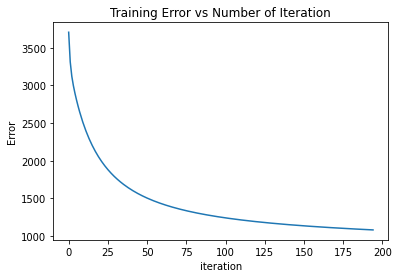

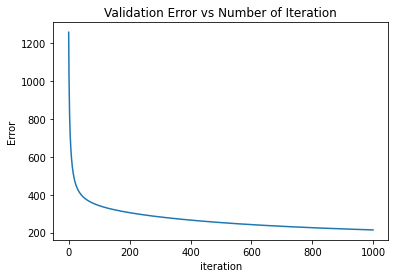

In [31]:
plt.plot(X,Y)
plt.title("Training Error vs Number of Iteration")
plt.ylabel('Error')
plt.xlabel('iteration')
plt.show()

plt.plot(X1,Y2)
plt.title("Validation Error vs Number of Iteration")
plt.ylabel('Error')
plt.xlabel('iteration')
plt.show()